# 遗传算法

## 结构一

Generation 500/8000, Best Fitness: 0.8001
Generation 1000/8000, Best Fitness: 0.8728
Generation 1500/8000, Best Fitness: 0.9847
Optimized Weights for Structure 1: [ -66.82810606  148.67680083 -143.38788434   76.17978756  -73.84618879
   77.34663848  -80.23309174   82.55712981  -82.81544686]
Input: [-1 -1], Predicted Output: 0.0302, Target: 0
Input: [-1  1], Predicted Output: 0.9633, Target: 1
Input: [ 1 -1], Predicted Output: 0.9701, Target: 1
Input: [1 1], Predicted Output: 0.0290, Target: 0


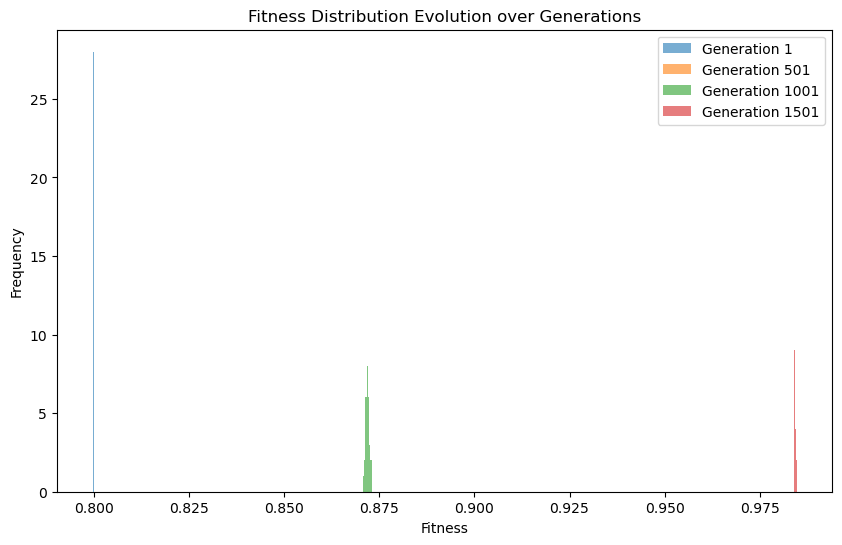

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义异或问题的输入和输出，替换0为-1
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X[X == 0] = -1  # 将所有0替换为-1
Y = np.array([0, 1, 1, 0])  # XOR目标输出

# 定义遗传算法参数
POP_SIZE = 50  # 种群大小
GENS = 8000  # 最大代数
MUTATION_RATE = 0.1  # 变异率
CROSSOVER_RATE = 0.7  # 交叉率

# 定义网络结构1的权重数目
NUM_WEIGHTS_STRUCTURE_1 = 9  # w10, w12, w13, w20, w30, w24, w25, w34, w35

# sigmoid 激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x/20))

# 前向传播 - 结构1
def forward_propagation_structure_1(weights, x):
    w10, w12, w13, w20, w30, w24, w25, w34, w35 = weights

    # 输入层到隐藏层
    h2 = sigmoid(w20 * -1 + w24 * x[0] + w25 * x[1])  # 节点2
    h3 = sigmoid(w30 * -1 + w34 * x[0] + w35 * x[1])  # 节点3

    # 隐藏层到输出层
    y = sigmoid(w10 * -1 + w12 * h2 + w13 * h3)
    return y

# 适应度评估函数（修改此处）
def evaluate_fitness_structure_1(weights):
    total_error = 0
    for i in range(len(X)):
        predicted = forward_propagation_structure_1(weights, X[i])
        total_error += (predicted - Y[i]) ** 2  # 累积平方误差

    # 计算MSE
    mse = total_error / len(X)

    # 适应度定义：1/(1+MSE)
    fitness = 1.0 / (1.0 + mse)
    return fitness

# 初始化种群
def initialize_population(size, num_weights):
    return np.random.uniform(-1, 1, (size, num_weights))

# 选择操作：轮盘赌选择
def select_parents(population, fitnesses):
    probabilities = fitnesses - fitnesses.min()  # 避免负值
    probabilities /= probabilities.sum()
    indices = np.random.choice(len(population), size=2, p=probabilities)
    return population[indices[0]], population[indices[1]]

# 交叉操作：单点交叉
def crossover(parent1, parent2):
    if np.random.rand() > CROSSOVER_RATE:
        return parent1, parent2  # 不交叉直接返回
    point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

# 变异操作
def mutate(weights):
    for i in range(len(weights)):
        if np.random.rand() < MUTATION_RATE:
            weights[i] += np.random.normal(0, 0.5)  # 小幅度随机变动
    return weights

# 主遗传算法流程
def genetic_algorithm_structure_1():
    # 初始化种群
    population = initialize_population(POP_SIZE, NUM_WEIGHTS_STRUCTURE_1)
    
    # 用于记录每代的适应度
    fitness_progression = []
    
    for generation in range(GENS):
        fitnesses = np.array([evaluate_fitness_structure_1(ind) for ind in population])
        
        # 记录当前代的适应度分布
        fitness_progression.append(fitnesses)
        
        # 输出每500代的最佳适应度
        if (generation + 1) % 500 == 0:
            best_fitness = fitnesses.max()
            print(f"Generation {generation + 1}/{GENS}, Best Fitness: {best_fitness:.4f}")
        
        # 如果适应度非常高（错误非常低），可提前停止
        best_fitness = fitnesses.max()
        # 这里的阈值可根据要求调整
        # 相当于 MSE非常小，比如 MSE<0.001 => fitness > 1/(1+0.001)=0.999
        if best_fitness > 0.999:
            break

        # 选择、交叉、变异生成新种群
        new_population = []
        while len(new_population) < POP_SIZE:
            parent1, parent2 = select_parents(population, fitnesses)
            child1, child2 = crossover(parent1, parent2)
            new_population.append(mutate(child1))
            new_population.append(mutate(child2))
        population = np.array(new_population[:POP_SIZE])

    # 返回最佳权重和适应度演变数据
    fitnesses = np.array([evaluate_fitness_structure_1(ind) for ind in population])
    best_index = fitnesses.argmax()
    return population[best_index], fitness_progression

# 执行遗传算法优化网络结构1
best_weights_structure_1, fitness_progression = genetic_algorithm_structure_1()

# 输出最终权重和测试结果
print("Optimized Weights for Structure 1:", best_weights_structure_1)
for i in range(len(X)):
    output = forward_propagation_structure_1(best_weights_structure_1, X[i])
    print(f"Input: {X[i]}, Predicted Output: {output:.4f}, Target: {Y[i]}")

# 绘制适应度分布的演变
fitness_progression = np.array(fitness_progression)
plt.figure(figsize=(10, 6))

max_generations_to_plot = len(fitness_progression)
for i in range(0, max_generations_to_plot, 500):  # 每500代绘制一次适应度分布
    plt.hist(fitness_progression[i], bins=10, alpha=0.6, label=f'Generation {i+1}')

plt.title("Fitness Distribution Evolution over Generations")
plt.xlabel("Fitness")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### 不同变异绿与交叉率对收敛次数的影响

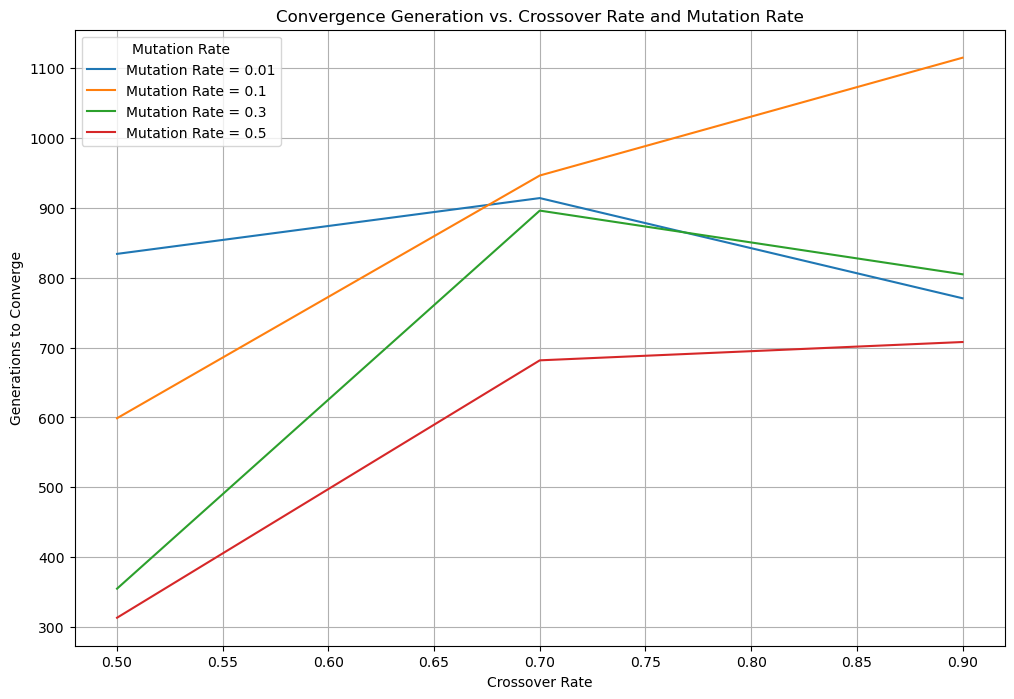

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义异或问题的输入和输出，替换0为-1
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X[X == 0] = -1  # 将所有0替换为-1
Y = np.array([0, 1, 1, 0])  # XOR目标输出

# 定义网络结构1的权重数目
NUM_WEIGHTS_STRUCTURE_1 = 9  # w10, w12, w13, w20, w30, w24, w25, w34, w35

# sigmoid 激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 前向传播 - 结构1
def forward_propagation_structure_1(weights, x):
    w10, w12, w13, w20, w30, w24, w25, w34, w35 = weights

    # 输入层到隐藏层
    h2 = sigmoid(w20 * -1 + w24 * x[0] + w25 * x[1])  # 节点2
    h3 = sigmoid(w30 * -1 + w34 * x[0] + w35 * x[1])  # 节点3

    # 隐藏层到输出层
    y = sigmoid(w10 * -1 + w12 * h2 + w13 * h3)
    return y

# 适应度评估函数
def evaluate_fitness_structure_1(weights):
    total_error = 0
    for i in range(len(X)):
        predicted = forward_propagation_structure_1(weights, X[i])
        total_error += (predicted - Y[i]) ** 2  # 均方误差
    return -total_error  # 适应度为误差的负值

# 初始化种群
def initialize_population(size, num_weights):
    return np.random.uniform(-1, 1, (size, num_weights))

# 选择操作：轮盘赌选择
def select_parents(population, fitnesses):
    probabilities = fitnesses - fitnesses.min()  # 避免负值
    probabilities /= probabilities.sum()
    indices = np.random.choice(len(population), size=2, p=probabilities)
    return population[indices[0]], population[indices[1]]

# 交叉操作：单点交叉
def crossover(parent1, parent2, crossover_rate):
    if np.random.rand() > crossover_rate:
        return parent1, parent2  # 不交叉直接返回
    point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

# 变异操作
def mutate(weights, mutation_rate):
    for i in range(len(weights)):
        if np.random.rand() < mutation_rate:
            weights[i] += np.random.normal(0, 0.3)  # 小幅度随机变动
    return weights

# 主遗传算法流程
def genetic_algorithm_structure_1(mutation_rate, crossover_rate):
    # 初始化种群
    population = initialize_population(POP_SIZE, NUM_WEIGHTS_STRUCTURE_1)
    
    # 记录代数
    generations_to_converge = None
    
    for generation in range(GENS):
        fitnesses = np.array([evaluate_fitness_structure_1(ind) for ind in population])
        
        # 如果适应度达到阈值，提前停止
        best_fitness = fitnesses.max()
        if best_fitness > -0.01:
            generations_to_converge = generation + 1
            break

        # 选择、交叉、变异生成新种群
        new_population = []
        while len(new_population) < POP_SIZE:
            parent1, parent2 = select_parents(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, crossover_rate)
            new_population.append(mutate(child1, mutation_rate))
            new_population.append(mutate(child2, mutation_rate))
        population = np.array(new_population[:POP_SIZE])

    return generations_to_converge

# 遗传算法参数
POP_SIZE = 50  # 种群大小
GENS = 2000  # 最大代数

# 变异率和交叉率的不同配置
mutation_rates = [0.01, 0.1, 0.3, 0.5]
crossover_rates = [0.5, 0.7, 0.9]

# 用于存储不同配置下的收敛代数
convergence_data = []

# 对每种变异率和交叉率组合运行实验
for mutation_rate in mutation_rates:
    for crossover_rate in crossover_rates:
        results = []
        for _ in range(10):  # 运行10次取平均值
            generations = genetic_algorithm_structure_1(mutation_rate, crossover_rate)
            if generations is None:
                generations = GENS  # 如果未收敛，则设为最大代数
            results.append(generations)
        
        # 记录每种配置下的收敛代数
        avg_generations = np.mean(results)
        convergence_data.append((mutation_rate, crossover_rate, avg_generations))

# 转换为NumPy数组以便绘图
convergence_data = np.array(convergence_data)

# 绘制结果
plt.figure(figsize=(12, 8))
for i, mutation_rate in enumerate(mutation_rates):
    plt.plot(crossover_rates, convergence_data[i*len(crossover_rates):(i+1)*len(crossover_rates), 2], label=f'Mutation Rate = {mutation_rate}')
    
plt.title('Convergence Generation vs. Crossover Rate and Mutation Rate')
plt.xlabel('Crossover Rate')
plt.ylabel('Generations to Converge')
plt.legend(title="Mutation Rate")
plt.grid(True)
plt.show()


## 结构二

Generation 500/8000, Best Fitness: -0.5991
Generation 1000/8000, Best Fitness: -0.0508
Generation 1500/8000, Best Fitness: -0.0021
Optimized Weights for Structure 1: [-20.66348976  31.16945392 -83.11853696 -20.7606715  -20.72420586
 -31.85296542 -31.56525809]
Input: [-1 -1], Predicted Output: 0.0153, Target: 0
Input: [-1  1], Predicted Output: 0.9838, Target: 1
Input: [ 1 -1], Predicted Output: 0.9836, Target: 1
Input: [1 1], Predicted Output: 0.0153, Target: 0


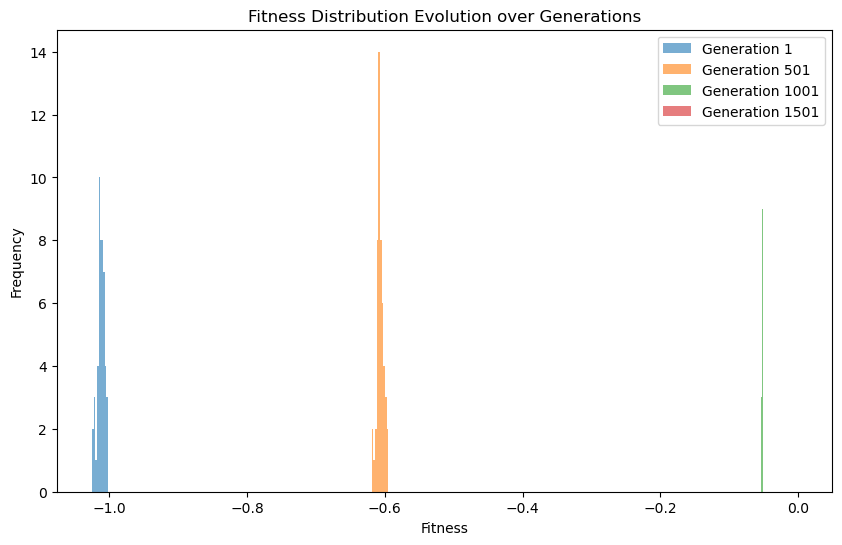

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义异或问题的输入和输出，替换0为-1
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X[X == 0] = -1  # 将所有0替换为-1
Y = np.array([0, 1, 1, 0])  # XOR目标输出

# 定义遗传算法参数
POP_SIZE = 50  # 种群大小
GENS = 8000  # 最大代数
MUTATION_RATE = 0.5  # 变异率
CROSSOVER_RATE = 0.7  # 交叉率

# 定义网络结构1的权重数目
NUM_WEIGHTS_STRUCTURE_1 = 7  # w10, w12, w13, w20, w24, w23,w14

# sigmoid 激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x/5))

# 前向传播 - 结构1
def forward_propagation_structure_1(weights, x):
    w10, w20, w12, w13, w14, w23, w24 = weights

    # 输入层到隐藏层
    h2 = sigmoid(w20 * -1 + w23 * x[0] + w24 * x[1])  # 节点2

    # 隐藏层到输出层
    y = sigmoid(w10 * -1 + w12 * h2 + w13 * x[0]+w14* x[1])
    return y

# 适应度评估函数
def evaluate_fitness_structure_1(weights):
    total_error = 0
    for i in range(len(X)):
        predicted = forward_propagation_structure_1(weights, X[i])
        total_error += (predicted - Y[i]) ** 2  # 均方误差
    return -total_error  # 适应度为误差的负值

# 初始化种群
def initialize_population(size, num_weights):
    return np.random.uniform(-1, 1, (size, num_weights))

# 选择操作：轮盘赌选择
def select_parents(population, fitnesses):
    probabilities = fitnesses - fitnesses.min()  # 避免负值
    probabilities /= probabilities.sum()
    indices = np.random.choice(len(population), size=2, p=probabilities)
    return population[indices[0]], population[indices[1]]

# 交叉操作：单点交叉
def crossover(parent1, parent2):
    if np.random.rand() > CROSSOVER_RATE:
        return parent1, parent2  # 不交叉直接返回
    point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:point], parent2[point:]))
    child2 = np.concatenate((parent2[:point], parent1[point:]))
    return child1, child2

# 变异操作
def mutate(weights):
    for i in range(len(weights)):
        if np.random.rand() < MUTATION_RATE:
            weights[i] += np.random.normal(0, 0.1)  # 小幅度随机变动
    return weights

# 主遗传算法流程
def genetic_algorithm_structure_1():
    # 初始化种群
    population = initialize_population(POP_SIZE, NUM_WEIGHTS_STRUCTURE_1)
    
    # 用于记录每代的适应度
    fitness_progression = []
    
    for generation in range(GENS):
        fitnesses = np.array([evaluate_fitness_structure_1(ind) for ind in population])
        
        # 记录当前代的适应度分布
        fitness_progression.append(fitnesses)
        
        # 输出每100代的最佳适应度
        if (generation + 1) % 500 == 0:
            best_fitness = fitnesses.max()
            print(f"Generation {generation + 1}/{GENS}, Best Fitness: {best_fitness:.4f}")
        
        # 如果适应度接近0，提前停止
        best_fitness = fitnesses.max()
        if best_fitness > -0.001:
            break

        # 选择、交叉、变异生成新种群
        new_population = []
        while len(new_population) < POP_SIZE:
            parent1, parent2 = select_parents(population, fitnesses)
            child1, child2 = crossover(parent1, parent2)
            new_population.append(mutate(child1))
            new_population.append(mutate(child2))
        population = np.array(new_population[:POP_SIZE])

    # 返回最佳权重和适应度演变数据
    best_index = fitnesses.argmax()
    return population[best_index], fitness_progression

# 执行遗传算法优化网络结构1
best_weights_structure_1, fitness_progression = genetic_algorithm_structure_1()

# 输出最终权重
print("Optimized Weights for Structure 1:", best_weights_structure_1)
for i in range(len(X)):
    output = forward_propagation_structure_1(best_weights_structure_1, X[i])
    print(f"Input: {X[i]}, Predicted Output: {output:.4f}, Target: {Y[i]}")
# 绘制适应度分布的演变
fitness_progression = np.array(fitness_progression)
plt.figure(figsize=(10, 6))

# 绘制适应度分布演变，确保不会越界
max_generations_to_plot = len(fitness_progression)
for i in range(0, max_generations_to_plot, 500):  # 每100代绘制一次适应度分布
    plt.hist(fitness_progression[i], bins=10, alpha=0.6, label=f'Generation {i+1}')

plt.title("Fitness Distribution Evolution over Generations")
plt.xlabel("Fitness")
plt.ylabel("Frequency")
plt.legend()
plt.show()


优点与缺点：</p>
遗传算法（GA）：</p>
优点：全局优化能力强，不易陷入局部最优解。</p>
缺点：收敛速度慢，训练时间长。</p>
反向传播算法（BP）：</p>
优点：训练速度快，收敛速度较快，适用于大多数问题。</p>
缺点：可能陷入局部最优解，尤其是深度网络中。</p>